In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_csv('Resources/campaign.csv')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category,subcategory,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,food,food trucks,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,music,rock,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1970-01-01 00:00:01.608184800,1970-01-01 00:00:01.640844000,technology,web,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1970-01-01 00:00:01.634792400,1970-01-01 00:00:01.642399200,music,rock,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1970-01-01 00:00:01.608530400,1970-01-01 00:00:01.629694800,theater,plays,cat4,subcat4


In [3]:
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category,subcategory,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,food,food trucks,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,music,rock,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1970-01-01 00:00:01.608184800,1970-01-01 00:00:01.640844000,technology,web,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1970-01-01 00:00:01.634792400,1970-01-01 00:00:01.642399200,music,rock,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1970-01-01 00:00:01.608530400,1970-01-01 00:00:01.629694800,theater,plays,cat4,subcat4


In [4]:
print(campaign_df.columns)

Index(['cf_id', 'contact_id', 'company_name', 'description', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launch_date',
       'end_date', 'category', 'subcategory', 'category_id', 'subcategory_id'],
      dtype='object')


In [5]:
# Show the most populat category per backers_count 
# Group by category_id and calculate the sum of backers_count for each category
category_popularity = campaign_df.groupby('category_id')['backers_count'].sum().reset_index()

# Merge with the Category DataFrame to get the category names
category_popularity = category_popularity.merge(campaign_df[['category_id', 'category']].drop_duplicates(),
                                                on='category_id', how='left')

# Sort by backers_count to get the most popular categories
category_popularity = category_popularity.sort_values(by='backers_count', ascending=False)

# Display the top categories
print(category_popularity[['category', 'backers_count']])

       category  backers_count
3       theater         264269
1         music         129002
4  film & video         121875
2    technology          67494
5    publishing          52619
6         games          37662
0          food          28846
7   photography          24044
8    journalism           1194


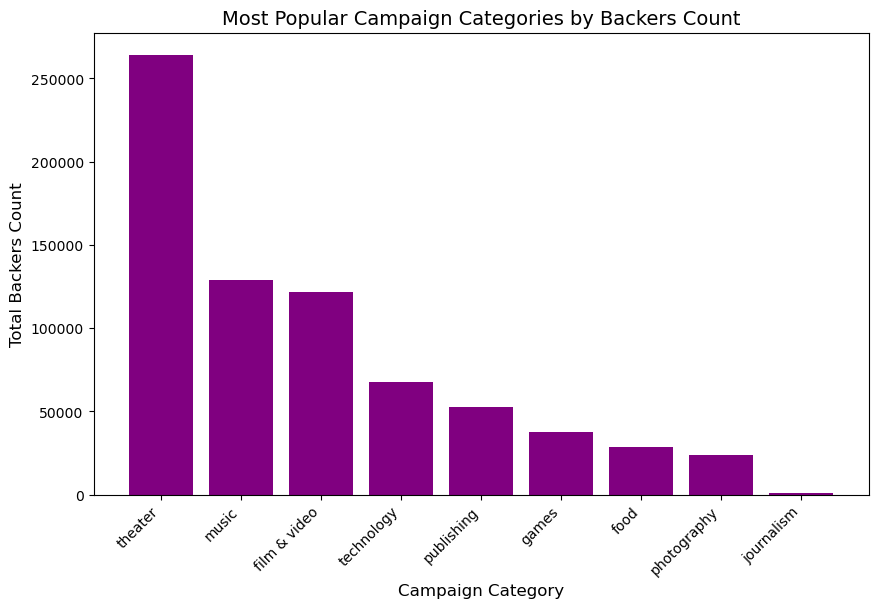

In [7]:
# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(category_popularity['category'], category_popularity['backers_count'], color='purple')

# Add titles and labels
plt.title('Most Popular Campaign Categories by Backers Count', fontsize=14)
plt.xlabel('Campaign Category', fontsize=12)
plt.ylabel('Total Backers Count', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
#pgAdmin code 
#SELECT c.category,
       #SUM(cd.backers_count) AS total_backers
#FROM campaign_data cd
#JOIN category c
  #ON cd.category_id = c.category_id
#GROUP BY c.category
#ORDER BY total_backers DESC;